In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# !unzip /content/ask1_1.zip

#**Part** **1**

Δημιουργεία DataFrame



In [ ]:
Location1 =r'/content/netflix_titles.csv'
Location2 = r'/content/IMDb ratings.csv'
Location3 = r'/content/IMDb movies.csv'

df = pd.read_csv(Location1)
df2 = pd.read_csv(Location2)
df3 = pd.read_csv(Location3, low_memory=False)

# remove duplicates
df = df.drop_duplicates(subset='show_id')
df3 = df3.drop_duplicates(subset='imdb_title_id')

##**Ερώτημα 1:** 
#Ποιό είδος υπερτερεί, οι ταινίες ή οι σειρές


Δημιουργεία διαγράμματος χρησιμοποιόντας την groupby και την plot.bar()

type
Movie      5377
TV Show    2410
Name: type, dtype: int64


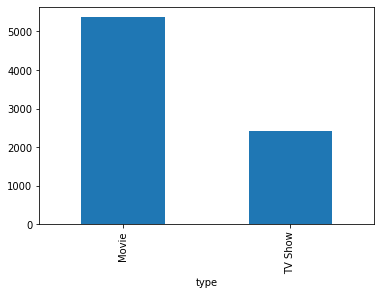

In [ ]:
types = df.groupby('type')
df_types_group = types['type'].count()

df_types_group.plot.bar()
print(df_types_group)

Επομένος υπερτερούν οι ταινίες

---














##**Ερώτημα 2**:
# Τα τελευταία χρόνια το netflix επενδύει περισσότερο σε ταινίες ή σε σειρές;

Αποφασίσαμε να πούμε για την περίοδο από 2018  μέχρι την ποιο σύγχρονη που υπάρχει στο αρχείο

type
Movie      4152
TV Show    1812
Name: type, dtype: int64

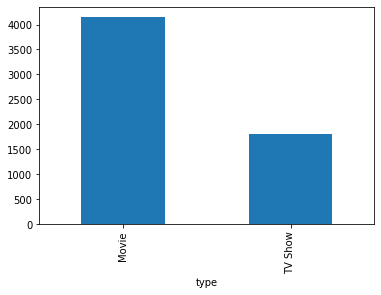

In [ ]:
#take the last 4 years 2018 - 2021
miniDf = df[['type', 'date_added']]
# drop empty rows
miniDf = miniDf.dropna()

df_last4y = miniDf[miniDf['date_added'].str[-4:] >= "2018"]
m = df_last4y
df_last4y_group = df_last4y.groupby('type')
df_last4y_group = df_last4y_group['type'].count()

df_last4y_group.plot.bar()
df_last4y_group

Επομένως το netflix επενδύει περισότερο στις ταινίες

---



##**Ερώτηση 3**:
#Ποιά χώρα έχει το περισσότερο περιεχόμενο;

Στο παρακάτω διάγραμμα φαίνετε το περιεχόμενο όσο αφορά τις ταινιες ή τις σειρές που έχει η κάθε χώρα

In [ ]:
miniDf = df[['country', 'type']]

# clean missing data
miniDf = miniDf.dropna()

# if countries  is more tha one at the same row split countries in separate rows
miniDf = (miniDf.set_index(miniDf.columns
                           .drop('country', 1).tolist())
                            .country.str.split(", ", expand=True)  # feed , '+' and whitespace
                            .stack().reset_index()
                            .rename(columns={0:'country'})
                            .loc[:, miniDf.columns])

w = (192, 85)
fig, ax = plt.subplots(figsize=w)

#Using countplot to plot the counts of every type for each country. 
#Since there are a lot of countries, you may zoom the following plot to see the results better.
sns.countplot(ax=ax, x = 'country', hue='type', data=miniDf)

Οπότε η χώρα με το περισσότερο περιεχόμενο είναι η United States


---




##**Ερώτηση 4**:
# Τι είδους περιεχόμενο έχει κάθε χώρα;

In [ ]:
#same as before
miniDf = df[['country', 'listed_in']]
miniDf = miniDf.dropna()


#if countries is more tha one at the same row split countries in separate rows
miniDf = (miniDf.set_index(miniDf.columns
                           .drop('country', 1).tolist())
                            .country.str.split(", ", expand=True)  # feed , '+' and whitespace
                            .stack().reset_index()
                            .rename(columns={0:'country'})
                            .loc[:, miniDf.columns])

# do the same for listed_in
miniDf =  (miniDf.set_index(miniDf.columns
                            .drop('listed_in', 1).tolist())
                            .listed_in.str.split(", ", expand=True)  # feed , '+' and whitespace
                            .stack().reset_index()
                            .rename(columns={0:'listed_in'})
                            .loc[:, miniDf.columns])

# duplicates of titles don't effect the result,
# if a movie/tv show has more tha one kind, it must count for each kind

w = (500, 200)
fig, ax = plt.subplots(figsize=w)

#Since there are a lot of countries and kinds of movies, you may zoom the following plot to see the results better.
sns.countplot(ax=ax, x = 'country', hue='listed_in', data=miniDf)



---



## **Ερώτηση 5**: 
#Ετοιμάστε γραφήματα που δειχνουν τους ηθοποιούς με τις περισσότερες ταινίες σε
#κάθε χώρα. Κάντε το ίδιο και για τις σειρές

Για τις ταινίες

Text(0.5, 1.0, 'Mexico')

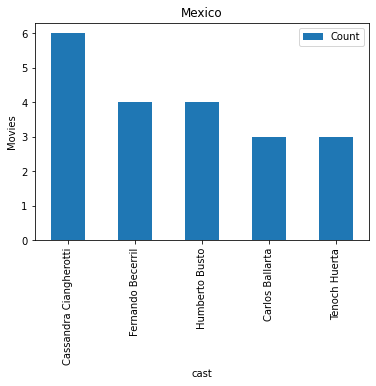

In [ ]:
miniDf = df[[ 'country', 'type', 'cast']]

miniDf = miniDf.dropna()

# build dataframe with one actor for each row
miniDf =  (miniDf.set_index(miniDf.columns
                            .drop('cast', 1).tolist())
                            .cast.str.split(", ", expand=True)  # feed , '+' and whitespace
                            .stack().reset_index()
                            .rename(columns={0:'cast'})
                            .loc[:, miniDf.columns])

# do the same for the countries
miniDf =  (miniDf.set_index(miniDf.columns
                            .drop('country', 1).tolist())
                            .country.str.split(", ", expand=True)  # feed , '+' and whitespace
                            .stack().reset_index()
                            .rename(columns={0:'country'})
                            .loc[:, miniDf.columns])


miniDf_Movies = miniDf[miniDf['type'] == 'Movie'].copy()


# add a column with the number of actors appearing in the same country
miniDf_Movies['Count'] = miniDf_Movies.groupby(['cast','country'])['type'].transform('count')

miniDf_Movies = miniDf_Movies.drop_duplicates(subset=['cast'])


# if you want to see another country change the string here
country = 'Mexico'
# change number if you want to see more actors
actors = 5    



# coment this and uncomment for loop if you want to see all countries
diagram = miniDf_Movies[miniDf_Movies['country'] == country].nlargest(actors, ['Count'])
diagram.plot(x='cast', y='Count', kind='bar')
plt.ylabel('Movies')
plt.title(country)



# for country in miniDf_Movies['country'].unique():
#   diagram = miniDf_Movies[miniDf_Movies['country'] == country].nlargest(actors, ['Count'])
#   diagram.plot(x = 'cast', y = 'Count', kind='bar')
#   plt.ylabel('Movies')
#   plt.title(country)



---



Για τις σειρές

Text(0.5, 1.0, 'Mexico')

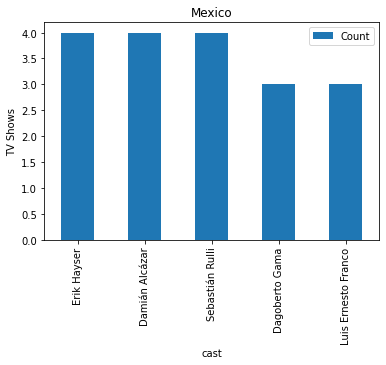

In [ ]:
# do the same for TV Shows
miniDf_TvShows = miniDf[miniDf['type'] == 'TV Show'].copy()

miniDf_TvShows = miniDf_TvShows.dropna()

# add a column with the number of actors appearing in the same country
miniDf_TvShows['Count'] = miniDf_TvShows.groupby(['cast','country'])['type'].transform('count')

# remove duplicates actors in country
miniDf_TvShows = miniDf_TvShows.drop_duplicates(subset=['cast'])


# if you want to see another country change the string here
country = 'Mexico'
# change number if you want to see more actors
actors = 5    


#coment this and uncomment for loop if you want to see all countries
diagram = miniDf_TvShows[miniDf_TvShows['country'] == country].nlargest(actors, ['Count'])
diagram.plot(x='cast', y='Count', kind='bar')
plt.ylabel('TV Shows')
plt.title(country)



# for country in miniDf_TvShows['country'].unique():
#   diagram = miniDf_TvShows[miniDf_TvShows['country'] == country].nlargest(number, ['Count'])
#   diagram.plot(x = 'cast', y = 'Count', kind='bar')
#   plt.ylabel('TV Shows')
#   plt.title(country)



---




##**Ερώτηση 6**:
# Το netflix υποστηρίζει ότι παρέχει πλούσιο περιεχόμενο για όλες τις ηλικίες.Αληθεύει αυτό; Φτιάξτε ένα γράφημα το οποίο συγκεντρώνει το πλήθος των ταινιων ανάλογα με την προτεινόμενη ηλικία (αναφερόμαστε στη στήλη rating). Τα όρια καθορίζονται σύμφωνα με τον παρακάτω πίνακα. Κάντε το ίδιο γράφημα και για τις σειρές.
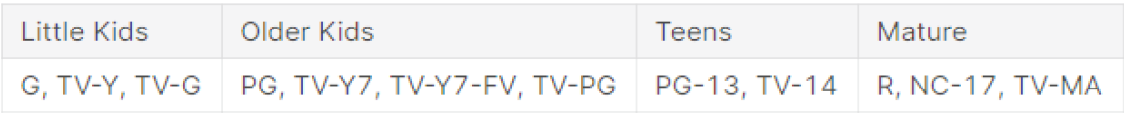

Text(0, 0.5, 'Movies')

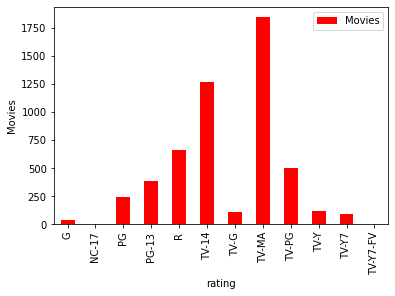

In [ ]:
miniDf_Movies = df[df['type'] == 'Movie'].copy()
# keep only the necessary columns
miniDf_Movies = miniDf_Movies[['show_id', 'rating']]
miniDf_Movies = miniDf_Movies.dropna()


# count every kind using groupby().count()
miniDf = miniDf_Movies.groupby('rating').count()
miniDf = miniDf.reset_index()

# remove Not Rated (NR) and Unrated (UR) movies
miniDf = miniDf[miniDf['rating'] != 'UR']
miniDf = miniDf[miniDf['rating'] != 'NR']

# now by default column show_id has the number of every kind of movie
miniDf.plot(x = 'rating', y='show_id', kind='bar', label='Movies', color = 'red')
plt.ylabel('Movies')

Text(0, 0.5, 'TV Shows')

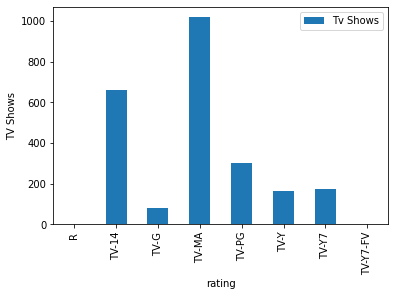

In [ ]:
#do the same for TV Shows
miniDf_TV = df[df['type'] == 'TV Show']
miniDf_TV = miniDf_TV[['show_id', 'rating']]
miniDf_TV = miniDf_TV.dropna()

miniDf = miniDf_TV.groupby('rating').count()
miniDf = miniDf.reset_index()

# remove Not Rated (NR) and Unrated (UR) movies
miniDf = miniDf[miniDf['rating'] != 'UR']
miniDf = miniDf[miniDf['rating'] != 'NR']

# now by default column show_id has the number of every kind of movie
miniDf.plot(x = 'rating', y='show_id', kind='bar', label='Tv Shows')
plt.ylabel('TV Shows')



---



##**Ερώτηση 7**:
#Αν ένας παραγωγός ήθελε να έχει υψηλή ακροαματικότητα, σκέφτεται ότι θα ήταν ίσως καλύτερα να βγάλει την ταινία του σε μία εποχή που δεν υπάρχει ανταγωνισμός. Κάντε ένα γράφημα με το περιεχόμενο που προστίθεται ανά μήνα για να τον βοηθήσετε να επιλέξει τη σωστή χρονική περίοδο.

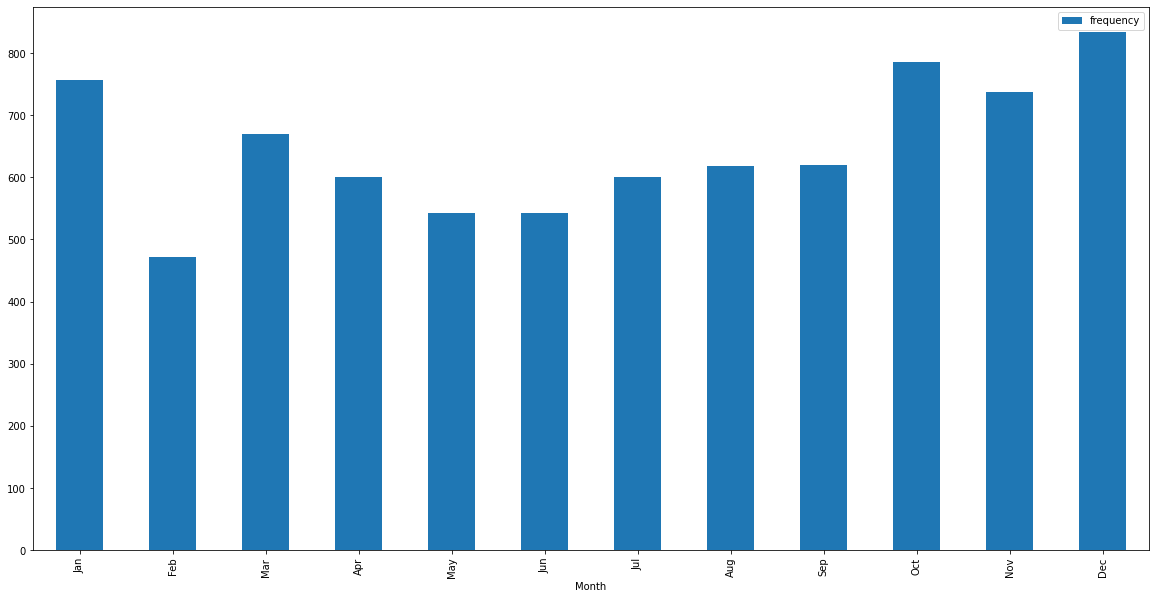

In [ ]:
import calendar

miniDf = df[['show_id', 'date_added']]

# remove null items
miniDf = miniDf.dropna()

# keep only month for every date added movie
miniDf['date_added'] = pd.to_datetime(miniDf['date_added']).dt.month
miniDf_group = miniDf.groupby('date_added').count()
months = miniDf_group.reset_index()

d = dict(enumerate(calendar.month_abbr))
months['Month'] = months['date_added'].map(d)

# months.plot(x='Month', y='show_id', label='frequency', figsize=(20, 10), kind='line')
months.plot(x='Month', y='show_id', label='frequency', figsize=(20, 10), kind='bar')



---



##**Ερώτηση 8**:
#Ετοιμάστε ένα γράφημα που παρουσιάζει συγκεντρωτικά τα είδη του περιεχομένου (αναφερόμαστε στη στήλη listed_in).

<BarContainer object of 42 artists>

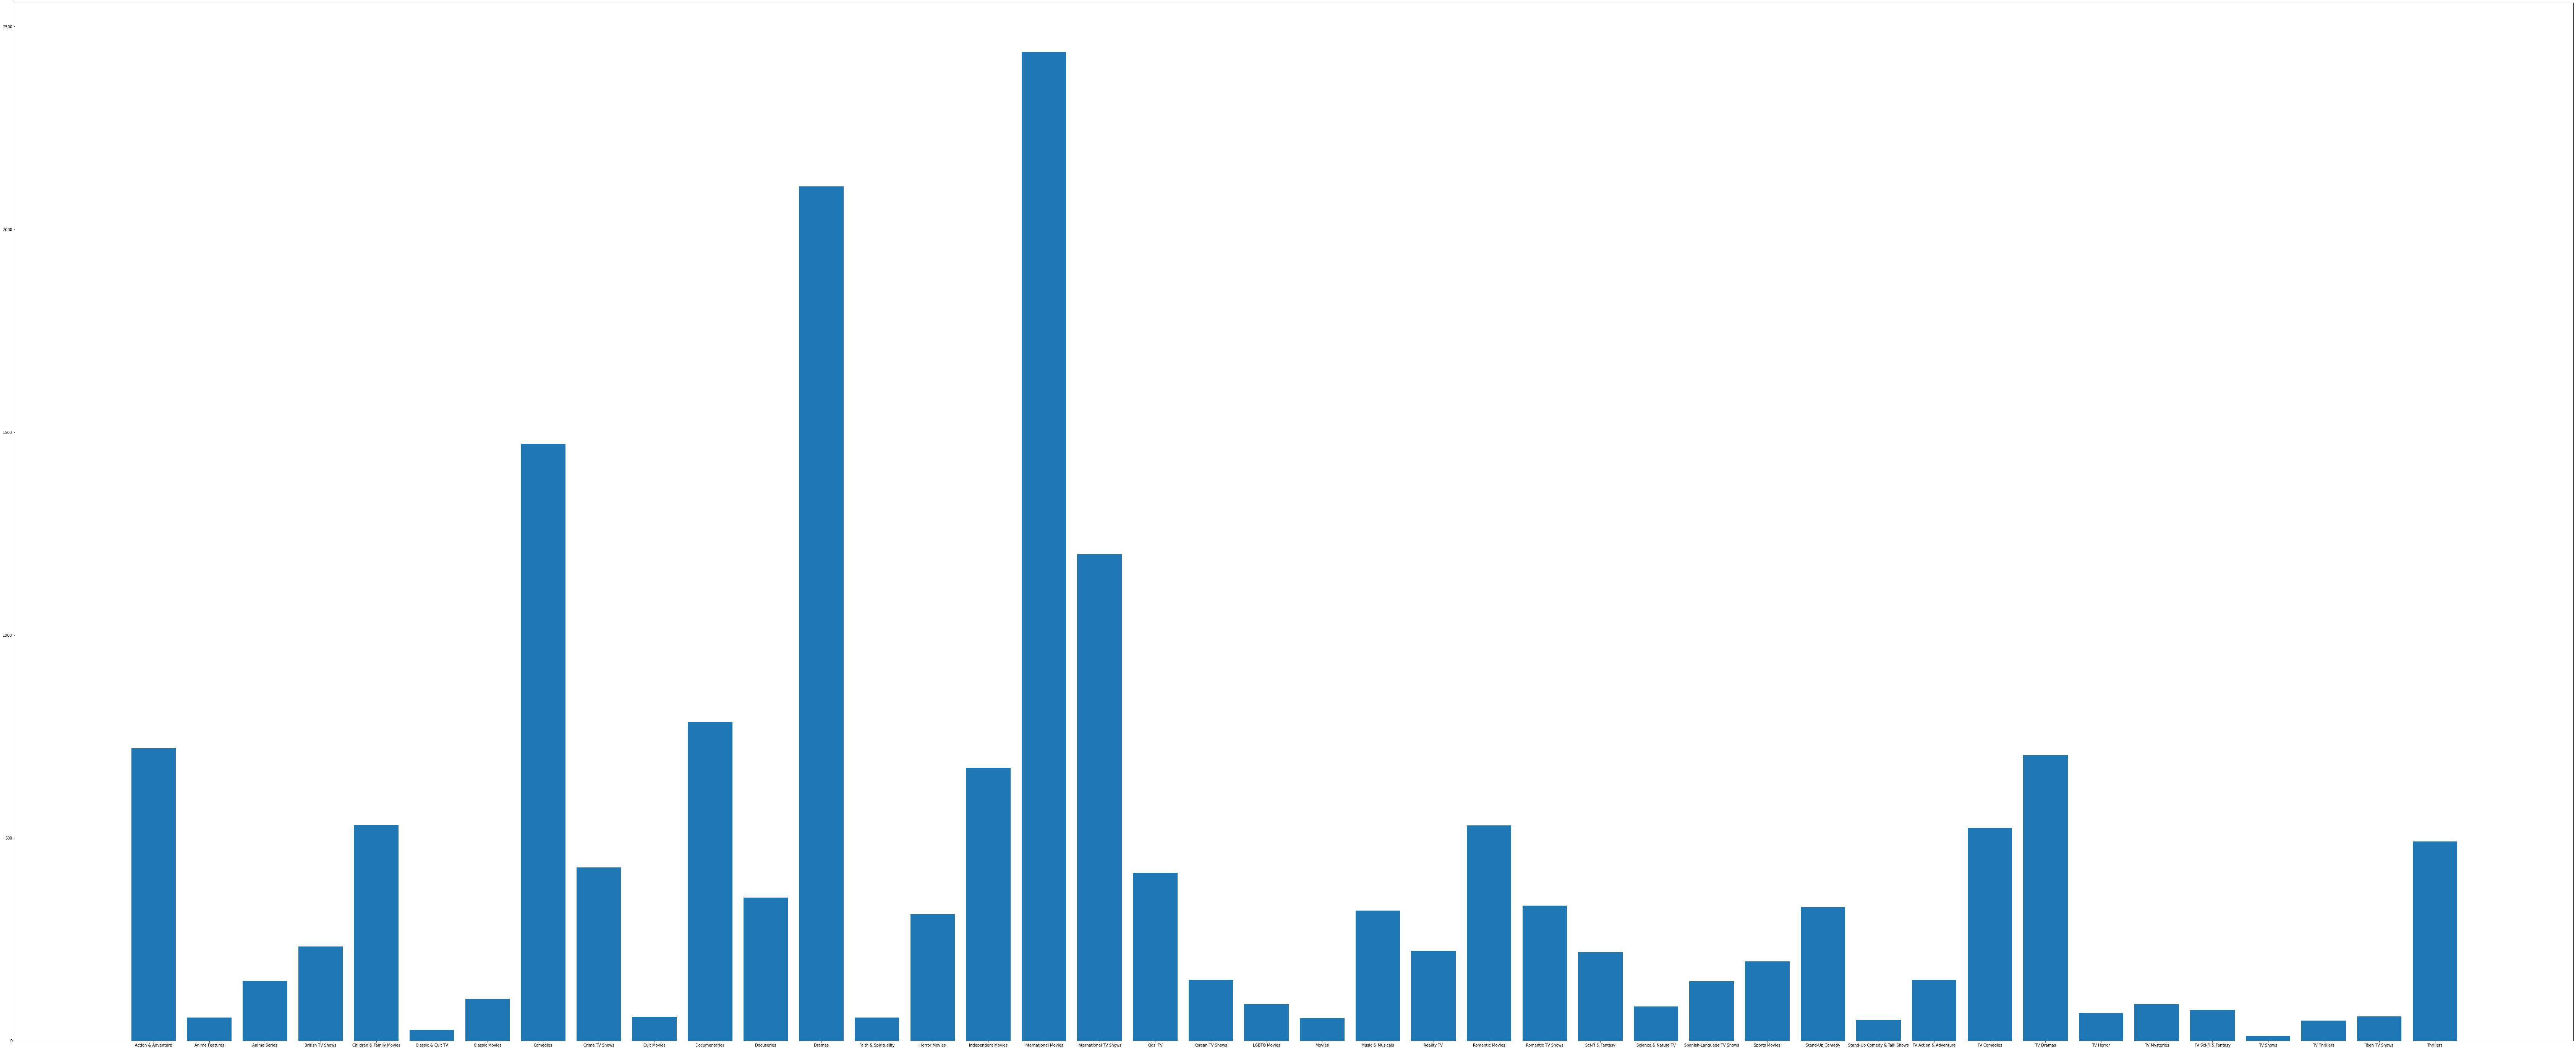

In [ ]:
#split the column listed_in separate rows one gerne for every row
miniDf = df[['show_id', 'listed_in']].copy()
miniDf = miniDf.dropna()

miniDf =  (df.set_index(df.columns
                            .drop('listed_in', 1).tolist())
                            .listed_in.str.split(", ", expand=True)  # feed , '+' and whitespace
                            .stack().reset_index()
                            .rename(columns={0:'listed_in'})
                            .loc[:, df.columns])

# at this point there isn't duplicate with the same title and the same listed_in
# so we can groupby and count to find the result

miniDf_group = miniDf.groupby('listed_in').count()
# reset head listed_in
miniDf_group = miniDf_group.reset_index() 

fig = plt.figure(figsize=(120,50))
plt.bar(miniDf_group['listed_in'], miniDf_group['show_id'])



---



##**Ερώτηση 9**:
#Μελετηστε τους σκηνοθέτες ανά χώρα και παρουσιάστε σχετικά γραφήματα


Μελετήσαμε τους σκηνοθέτες με βάση των αριθμό ταινιών και σειρών που έχουν βγάλει στην κάθε χώρα

Απεικόνηση των top n σκηνοθετών για τις Σειρες (Με βάση των αριθμό σειρων που εχει ο σκηνοθέτης στην καθε χώρα)

Σε περίπτωση που λείπει είτε η χώρα/τιτλος ταινιας/σκηνοθέτη το πετάμε απο το dataframe καθως θεωρούμε οτι ενας σκηνοθέτης χωρίς αυτα τα στοιχεία δεν αποτελεί αξιόπιστη πληροφορία για την βάση.

Text(0, 0.5, 'Movies')

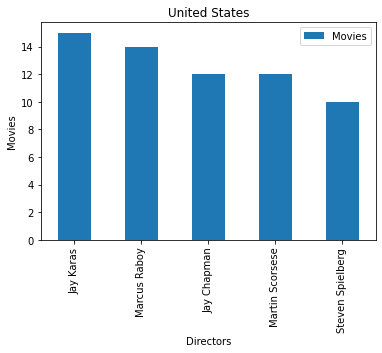

In [ ]:
# director for the Movies
# split countries if there are more tha one in the same row
miniDf = df[['show_id', 'type', 'title', 'director', 'country']].copy()
miniDf = miniDf.dropna()  # drop useless rows

# split countries
miniDf =  (miniDf.set_index(miniDf.columns
                            .drop('country', 1).tolist())
                            .country.str.split(", ", expand=True)  # feed , '+' and whitespace
                            .stack().reset_index()
                            .rename(columns={0:'country'})
                            .loc[:, miniDf.columns])

#split directories
miniDf =  (miniDf.set_index(miniDf.columns
                            .drop('director', 1).tolist())
                            .director.str.split(", ", expand=True)  # feed , '+' and whitespace
                            .stack().reset_index()
                            .rename(columns={0:'director'})
                            .loc[:, miniDf.columns])


# for every director in country find the number of movies which created
miniDf_Movies = miniDf[miniDf['type'] == 'Movie']
miniDf_Movies = miniDf_Movies.groupby(['director', 'country']).count()
miniDf_Movies = miniDf_Movies.reset_index() 


#change country if you want to see other one or uncomment for loop to see all countries
country = 'United States'
n = 5

diagram = miniDf_Movies[miniDf_Movies['country'] == country].nlargest(n, ['title'])


# comment this and uncomment for loop if you want to see for every country

diagram.plot(x = 'director', y = 'title', kind='bar', label='Movies')
plt.title(country)
plt.xlabel('Directors')
plt.ylabel('Movies')


# for country in miniDf_Movies['country'].unique():
#   diagram = miniDf_Movies[miniDf_Movies['country'] == country].nlargest(n, ['title'])
#   diagram.plot(x = 'director', y = 'title', kind='bar')
#   plt.ylabel('Movies')
#   plt.xlabel('Director')
#   plt.title(country)

Απεικόνηση των top n σκηνοθετών για τις Σειρές

Text(0, 0.5, 'TV Shows')

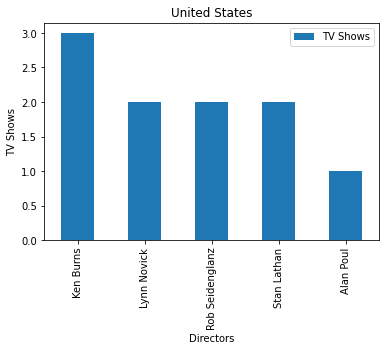

In [ ]:
miniDf_TVShows = miniDf[miniDf['type'] == 'TV Show']
miniDf_TVShows = miniDf_TVShows.groupby(['director', 'country']).count()
miniDf_TVShows = miniDf_TVShows.reset_index() 


#change country if you want to see other one or uncomment for loop to see all countries
country = 'United States'
n = 5

diagram = miniDf_TVShows[miniDf_TVShows['country'] == country].nlargest(n, ['title'])


# comment this and uncomment for loop if you want to see for every country

diagram.plot(x = 'director', y = 'title', kind='bar', label='TV Shows')
plt.title(country)
plt.xlabel('Directors')
plt.ylabel('TV Shows')


# for country in miniDf_Movies['country'].unique():
#   diagram = miniDf_TVShows[miniDf_TVShows['country'] == country].nlargest(n, ['title'])
#   diagram.plot(x = 'director', y = 'title', kind='bar')
#   plt.ylabel('Movies')
#   plt.xlabel('Director')
#   plt.title(country)



---



##**Ερώτηση 10**
#Μελετήστε τις σειρές και παρουσιάστε ένα γράφημα που τις δείχνει ανάλογα με το αριθμό των seasons.

<BarContainer object of 15 artists>

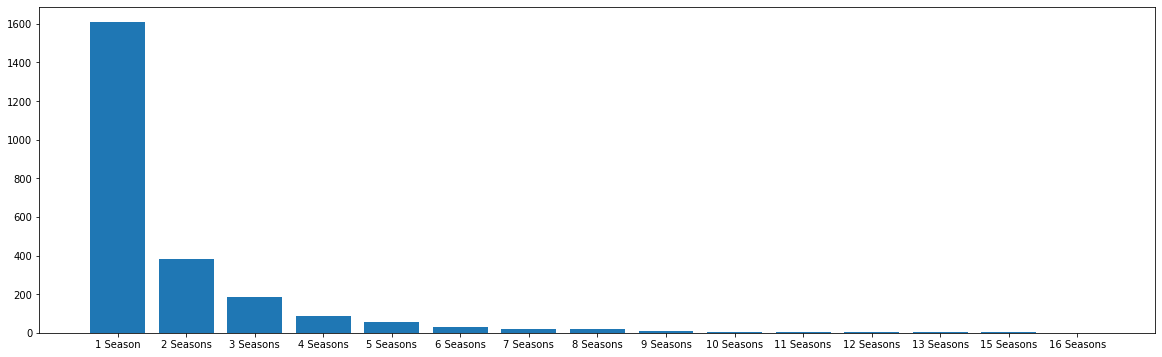

In [ ]:
miniDf_TVShows = df[df['type'] == 'TV Show']

# there isn't duplicates tv shows in dataframe
# miniDf_TVShows[miniDf_TVShows['title'].duplicated()]  

# group seasons and count number of Tv Shows
seasons = miniDf_TVShows.groupby('duration').count()
diagram = seasons.reset_index()

# sort seasons 
diagram = diagram.iloc[diagram['duration'].str[:2].astype(int).argsort()]

fig = plt.figure(figsize = (20, 6))
plt.bar(diagram['duration'], diagram['show_id'])



---



##**Ερώτηση 11**:
#Αξιοποιήστε τα υπόλοιπα αρχεία της εργασίας για να απαντήσετε στο ερώτημα: Ποιές είναι οι ταινίες με την πιο υψηλή βαθμολογία; Θα χρειαστεί να συννενώσετε κατάλληλα τα αρχεία που σας δίνονται ώστε να κρατήσετε τις ταινίες του netflix για τις οποίες υπάρχουν ratings στο IMBD.

Θα χρησιμοποιήσουμε το αρχείο IMDb movies.csv λόγο της στήλης avg_vote. Σε περίπτωση που υπάρχει διπλή βαθμολογία για την ταινία παίρνουμε την μέγιστη βαθμολογία. Σε περίπτωση που υπάρχουν missing data αυτά χάνονται μετά το merge

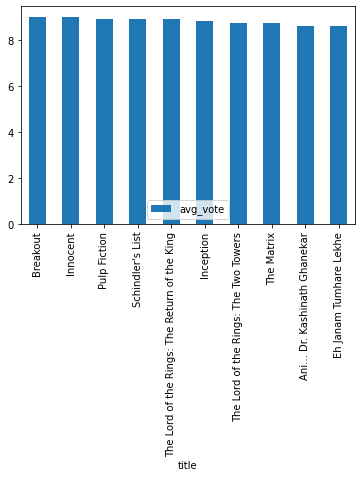

In [ ]:
netflix_titles = df['title']
netflix_titles = netflix_titles.to_frame()

imdb_movies = df3[['original_title', 'avg_vote']]

# drop useless data
imdb_movies = imdb_movies.dropna()

# rename column for merging
new_name = netflix_titles.keys()[0]
imdb_movies = imdb_movies.rename(columns={'original_title': new_name})

# keep the most largest vote for movie
imdb_movies = imdb_movies.groupby('title')['avg_vote'].max()
imdb_movies = imdb_movies.to_frame()
imdb_movies = imdb_movies.reset_index()



# merge dataframes (netflix + imdb) and remove NaN items
new_df = pd.merge(netflix_titles, imdb_movies, on = 'title', how='inner')

#take the 10 top movies
diagram = new_df.nlargest(10, ['avg_vote'])

diagram.plot(kind='bar', x = 'title', y='avg_vote')



---



#**Part 2**

##**Ερώτηση 1:**
#Θα δημιουργήσετε 2 διαφορετικά representations για κάθε ταινία, βασιζόμενοι στις περιγραφές που περιέχονται στις παραπάνω στήλες:


1.   Δημιουργήστε το boolean BoW πίνακα των unigrams και των bigrams από τη
κειμενική αναπαράσταση των ταινιών. (χρησιμοποιήστε την παράμετρο
ngram_range του CountVectorizer).
2.   Δημιουργήστε τον TF-IDF (Term Frequency - Inverse Document Frequency)
πίνακα των unigrams και των bigrams από τη κειμενική αναπαράσταση των
ταινιών.

Διατρέξτε τους πίνακες από το 1 και υπολογίστε τις ομοιότητες όλων των ταινιών μεταξύ
τους (και με τους δύο τρόπους 2.α, 2.β). Έπειτα αποθηκεύστε για κάθε ταινία τις 100 πιο
όμοιες με αυτή σε ένα python dictionary.


### Boolean BoW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

miniDf = df[['show_id', 'title', 'description']]
miniDf = miniDf.dropna()
# miniDf[miniDf.duplicated()]


miniDf['title_descript'] = miniDf['title'] + " " + miniDf['description']
miniDf['title_descript'] = miniDf['title_descript'].fillna('NULL')
movies = miniDf['title_descript'].tolist()

# vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=1, max_df=1.0, max_features=1000, stop_words='english')  
vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=100, stop_words='english')  
X = vectorizer.fit_transform(movies)

feature_c = vectorizer.get_feature_names()
arr = X.toarray()

# print(len(feature_c))
# feature_c

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

miniDf = df[['show_id', 'title', 'description']]
miniDf = miniDf.dropna()
# miniDf[miniDf.duplicated()]


miniDf['title_descript'] = miniDf['title'] + " " + miniDf['description']
miniDf['title_descript'] = miniDf['title_descript'].fillna('NULL')
movies = miniDf['title_descript'].tolist()

# tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df = 1.0, min_df = 0, max_features = 10, stop_words = 'english')
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(movies)


features_tf = tfidf_vectorizer.get_feature_names()

# features_tf

##**Ερώτηση 2:**
#Χρησιμοποιώντας τις παραπάνω αναπαραστάσεις των ταινιών υπολογίστε την ομοιότητα μεταξύ τους. 


*   a. Για την αναπαράσταση από το 1.α, θα αξιοποιήσετε το Jaccard/Tanimoto coefficient για να υπολογίσετε την ομοιότητα 2 ταινιών δοθέντων των feature
vectors τους.


*   b. Για την αναπαράσταση από το 1.β, θα αξιοποιήσετε το cosine similarity.

Διατρέξτε τους πίνακες από το 1 και υπολογίστε τις ομοιότητες όλων των ταινιών μεταξύ
τους (και με τους δύο τρόπους 2.α, 2.β). Έπειτα αποθηκεύστε για κάθε ταινία τις **100 πιο όμοιες με αυτή** σε ένα python dictionary.



### Jaccard coefficient

In [ ]:
from scipy.spatial import distance

# cdist with metric jaccard Computes the Jaccard distance between the points. 
# Given two vectors, u and v, the Jaccard distance is the proportion of those elements u[i] and v[i] that disagree where at least one of them is non-zero.
# We check for every movie all distances between others movies
distance_btVectors = distance.cdist(arr, arr, metric='jaccard')
distance_btVectors

array([[0.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 0.  , 1.  , ..., 0.75, 1.  , 1.  ],
       [1.  , 1.  , 0.  , ..., 1.  , 1.  , 1.  ],
       ...,
       [1.  , 0.75, 1.  , ..., 0.  , 1.  , 0.75],
       [1.  , 1.  , 1.  , ..., 1.  , 0.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 0.75, 1.  , 0.  ]])

Στο παραπάνω πίνακα φαίνονται οι αποστάσεις που έχει το κάθε στοιχείο απο το επιλεγόμενο, όσο πλησιέστερα είναι κάποιο αντικείμεντο τόσο ποιο πολύ όμοιο είναι και σε αυτό 

In [ ]:
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity


# get N similar movies for every movie from a dataframe      
def getNsimilarMovies_jaccard(dataFrame, distances, N):

  if N >= len(distances):
    print("Too many movies")
    return

  # initialize a dict
  allMovies = { x : list() for x in range(len(distances)) }


  # id for every array of distance
  # every index is a movie in our dataFrame
  for id, ndistances in enumerate(distances):

    for i in range(id+1, len(distances)):
      allMovies[id].append((i, ndistances[i]))
      allMovies[i].append((id, ndistances[i]))

    # sort all movies based on the distance
    allMovies[id].sort(key=lambda x:x[1])

  # Save the N closer items for every item and the distance between them
  nMovies = {i: allMovies[i][:N] for i in allMovies}

  # Drop distances, keep only the index for every movie
  nMovies = { i: list(zip(*nMovies[i][:]))[0] for i in nMovies }

  return nMovies




mydict = getNsimilarMovies_jaccard(miniDf, distance_btVectors, 100)


# output: 100 similar movies with the movie: show_id = s1 (index = 0)
mydict[0]

(541,
 629,
 1415,
 3060,
 6199,
 7378,
 7550,
 1275,
 1552,
 1667,
 2162,
 2566,
 3014,
 3122,
 3428,
 3837,
 4298,
 4456,
 4562,
 4686,
 4831,
 5929,
 6454,
 6955,
 7626,
 302,
 956,
 1627,
 1698,
 1960,
 2018,
 2320,
 2377,
 2758,
 3031,
 4470,
 4532,
 4743,
 5552,
 5589,
 5991,
 6114,
 6124,
 6608,
 6643,
 6722,
 6816,
 7143,
 7200,
 7345,
 7567,
 544,
 1078,
 1131,
 1633,
 2495,
 2742,
 3908,
 4916,
 5549,
 6241,
 6381,
 6807,
 6835,
 6841,
 7021,
 7269,
 32,
 245,
 303,
 507,
 1027,
 1931,
 2127,
 3596,
 3902,
 4106,
 4112,
 4710,
 5659,
 6470,
 6932,
 7380,
 7744,
 128,
 175,
 1089,
 1566,
 2512,
 2837,
 5480,
 7222,
 7296,
 440,
 1647,
 5403,
 5707,
 6452,
 6156,
 1)

Παραπάνω απεικονήζονται οι 100 ποιο όμοιοες ταινίες/σειρές για την ταινία/σειρα 
με index 0 στο dataframe συμφωνα με την μέθοδο jaccard coefficient. Καθε αριθμός ειναι ένα index στο DataFrame = miniDf. 

Η ομοιότητα εμφανίζεται με φθίνουσα σειρα, συνεπώς την μεγαλύτερη ομοιότητα την εχει **η πρώτη ταινία**

In [ ]:
# For example:
print(miniDf['title'].iloc[0])
print(miniDf['title_descript'].iloc[0], '\n')

print(miniDf['title'].iloc[541])
print(miniDf['title_descript'].iloc[541])

3%
3% In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. 

Anon
Anon In a future where technology has rendered privacy obsolete, a detective investigates a serial assassin who has been deleted from all visual records.


Πολλές ταινίες δεν είναι όμοιες στα αποτελέσματα λόγο του ορίσματος min_df=100. (σε περίπτωση που δεν μπούν ορίσματα ο χρόνος εκτέλεσης είναι πραγματικά μεγάλος). Σε περίπτωση που μια ταινία έχει 1.0 distance απο την ταινία που ψάχνουμε (δηλαδή δεν είναι όμοια) και δεν υπάρχει άλλη ταινία ποιο όμοια τοτε μπαίνει στην λίστα ωστε να συμπληρωθούν οι 100 ταινίες



---



### Cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cosine_similarity <= 1  
similarity = cosine_similarity(tfidf)
similarity

array([[1.        , 0.        , 0.01885782, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.03066675, 0.        ,
        0.        ],
       [0.01885782, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.03066675, 0.        , ..., 1.        , 0.        ,
        0.00773692],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00773692, 0.        ,
        1.        ]])

In [ ]:
#get N similar movies for every movie from a dataframe      
def getNsimilarMovies_cos_similarity(dataFrame, similarities, N):

  if N >= len(similarities):
    print("Too many movies")
    return

  # initialize a dict with the ids of movies as a key and a empty list as values
  allMovies = {x : list() for x in range(len(similarities))}

  # id for every array of distance
  for id, nsimilarity in enumerate(similarities):

    show_id1 = dataFrame['show_id'].iloc[id]

    # id for every distance between item
    for i in range(id+1, len(similarities)):

      allMovies[id].append((i, nsimilarity[i]))
      allMovies[i].append((id, nsimilarity[i]))

    # sort all movies based on the similarity
    allMovies[id].sort(key=lambda x:x[1])

  # Save the N similar items for every item and the similarity between them
  nMovies = {i:allMovies[i][-N:] for i in allMovies}

  # Save only movies, drop similarities
  nMovies = { i: list(zip(*nMovies[i][:]))[0] for i in nMovies }

  return nMovies



mydict = getNsimilarMovies_cos_similarity(miniDf, similarity, 100)

# print the similar movies with show_id = s11
mydict[10]

(2513,
 2844,
 2477,
 689,
 3972,
 5182,
 154,
 3399,
 4984,
 1699,
 80,
 5921,
 1851,
 182,
 6124,
 5211,
 5212,
 2252,
 4035,
 1489,
 6044,
 5871,
 7104,
 6123,
 301,
 6333,
 6847,
 7530,
 3400,
 6122,
 7366,
 6263,
 6251,
 4515,
 990,
 2784,
 5393,
 1319,
 584,
 4886,
 2900,
 6345,
 3714,
 4052,
 135,
 4034,
 4224,
 411,
 5704,
 7672,
 6106,
 6771,
 1658,
 7020,
 3863,
 5439,
 2886,
 1363,
 1623,
 7693,
 1557,
 5587,
 6533,
 5642,
 4822,
 1104,
 3994,
 6237,
 6315,
 6530,
 4509,
 4719,
 6938,
 6680,
 4289,
 2011,
 4809,
 6401,
 7083,
 2044,
 190,
 992,
 1619,
 6062,
 651,
 6988,
 2454,
 6250,
 6900,
 236,
 7454,
 6238,
 6924,
 6149,
 3250,
 2887,
 2906,
 519,
 139,
 6678)

Όπως και στο προηγούμενο ερώτημα παραπανω απεικονίζονται οι 100 ποιο ομοιες ταινιες για την σειρα με show_id = s11 (index = 10)  η ποιο όμοια σε αυτη την ταινία είναι **η τελευταία ταινία** στην παραπάνω στήλη. Σε περίπτωση που μια ταινία έχει 0.0 similarity (δηλαδη δεν ειναι ομοια) και δεν υπάρχει άλλη ταινία με μεγαλύτερο similarity τοτε μπαίνει στην λίστα ωστε να συμπληρωθούν οι 100 ταινίες που ζητούνται

In [ ]:
# For example:
print(miniDf['title'].iloc[10])
print(miniDf['title_descript'].iloc[10], '\n')

print(miniDf['title'].iloc[6678])
print(miniDf['title_descript'].iloc[6678])

1922
1922 A farmer pens a confession admitting to his wife's murder, but her death is just the beginning of a macabre tale. Based on Stephen King's novella. 

The Mist
The Mist Trapped by a mysterious fog, residents of a Maine village discover that it hides nightmarish creatures. A new series based on Stephen King's novella.




---



##**Ερώτηση 3:** 
#Πρόβλεψη (1): Φτιάξτε μία συνάρτηση η οποία παίρνει σαν είσοδο ένα τίτλο, ένα ακέραιο αριθμό N και τον τρόπο εύρεσης της ομοιότητας (boolean ή tf-idf σύμφωνα με τα 1,2) και επιστρέφει τους Ν πιο όμοιους τίτλους.

#*get_similar_movies1('Title_of_the_movie', N=10, method=’boolean’)*

#Παρουσιάστε ενδεικτικά αποτελέσματα από την παραπάνω συνάρτηση και σχολιάστε για τις ποιοτικές διαφορές με τους δύο τρόπους υπολογισμού της ομοιότητας των ταινιών.4.

In [ ]:
# every key in df_dict is an index for the column = title in our dataFrame
df_dict = miniDf['title'].to_dict()


# get the key (index) for the title
def get_key(title):
  for key, titl in df_dict.items():
    if title == titl:
      return key





# return N most similar titles based in jaccard distance
def boolean(title, N):

  if N >= len(distance_btVectors):
    print("Too many titles")
    return

  index_title = get_key(title)

  allTitles = []

  # id for every distance between item (distance_btVectors was computed in the previous cell)
  # go to the title with index = index_title, ignore all others distances
  for id, ndistance in enumerate(distance_btVectors[index_title]):
    
    if id != index_title:
      titl = miniDf['title'].iloc[id]
      descr = miniDf['description'].iloc[id]
      allTitles.append((titl, descr, ndistance))

  # sort titles based on the distance
  allTitles.sort(key=lambda x:x[2])

  # Save the N similar items for every item and the similarity between them
  nTitles = allTitles[:N]

  # Save only N more closer titles , drop distances
  nTitles = list(list(zip(*nTitles))[:2]) 
  
  return nTitles





# return N most similar titles based in cosine similarity
def tf_idf(title, N):

  # also here similarity were calculated in a previous question
  if N >= len(similarity):
    print("Too many titles")
    return
    
  allTitles = []
  index_title = get_key(title)

  # go to the title with index = index_title, ignore all others similarities
  for id, nsimilarity in enumerate(similarity[index_title]):

    if id != index_title:
      titl = miniDf['title'].iloc[id]
      descr = miniDf['description'].iloc[id]
      allTitles.append((titl, descr, nsimilarity))

  # sort titles based on the distance
  allTitles.sort(key=lambda x:x[2])

  # Save the N similar items for every item and the similarity between them
  nTitles = allTitles[-N:]


  # Save only N more closer titles , drop distances
  nTitles = list(list(zip(*nTitles))[:2]) 

  return nTitles





def get_similar_movies1(title, N, method):

  Ntitles = method(title, N)
  movies = list(zip(*Ntitles))
  movies.reverse()
  movies = pd.DataFrame(movies, columns=['title', 'description'])

  return movies

In [ ]:
# First example for tf_idf
print("title: Naruto\n")

print("10 Similar Movies:\n")

get_similar_movies1('Naruto', 10, tf_idf)

title: Naruto

10 Similar Movies:



,title,description
0,Naruto Shippuden: The Movie,The adventures of adolescent ninja Naruto Uzum...
1,Naruto Shippuden : Blood Prison,Mistakenly accused of an attack on the Fourth ...
2,Naruto the Movie: Ninja Clash in the Land of Snow,"Naruto, Sasuke and Sakura learn they'll be pro..."
3,Naruto Shippûden the Movie: Bonds,When strange ninjas ambush the village of Kono...
4,Beyblade: Metal Fusion,"In this anime adventure series for kids, the f..."
5,Naruto the Movie 2: Legend of the Stone of Gelel,"While on a mission to return a missing pet, Na..."
6,Naruto the Movie 3: Guardians of the Crescent ...,Exuberant ninja Naruto teams up with his pals ...
7,Naruto Shippuden: The Movie: The Lost Tower,"When Naruto is sent to recover a missing nin, ..."
8,Sabrina,A toy manufacturer and his wife are terrorized...
9,Gormiti,Four friends become guardians of the island Go...


In [ ]:
# First example for boolean
print("title: 3%")

print("10 Similar Movies:\n")
get_similar_movies1('3%', 10, boolean)

title: 3%
10 Similar Movies:



,title,description
0,Dear Zindagi,A young cinematographer with a bright professi...
1,Cultivating the Seas: History and Future of th...,An in-depth look at the full-cycle breeding pr...
2,Chappaquiddick,Senator Ted Kennedy watches his future unravel...
3,What Happened to Monday,"In a future with a strict one-child policy, si..."
4,Uyare,An aspiring pilot fights for her future – and ...
5,The Car: Road to Revenge,"Trying to uphold justice in a lawless future, ..."
6,Irreplaceable You,A stunning cancer diagnosis spurs Abbie to see...
7,Cleverman,"In the near future, physically powerful beings..."
8,Automata,"In a dystopian future, an insurance adjuster f..."
9,Anon,In a future where technology has rendered priv...


Παρατηρούμε την αστοχία της μεθόδου boolean λόγο του περιορισμένου λεξιλογίου



---



##**Ερώτηση 4:**
#Πρόβλεψη (2): Φτιάξτε μία συνάρτηση η οποία παίρνει σαν είσοδο μια ακολουθία από λέξεις (π.χ. Περιγραφή μιας ταινίας), ένα ακέραιο αριθμό N και τον τρόπο εύρεσης της ομοιότητας και επιστρέφει τους Ν πιο όμοιους τίτλους με βάση αυτή τη εριγραφή. Το συγκεκριμένο σύστημα θα μετασχηματίζει τη περιγραφή της εισόδου σε ένα feature vector, ανάλογα με την επιλεγμένη μεθοδολογία, και χρησιμοποιώντας τους κατάλληλους πίνακες και μετρικά από τα 1,2 θα επιστρέφει τις πιο σχετικές ταινίες.

#*get_similar_movies2('War between America and Vietnam', N=10, method=’tf-idf’)*

#Παρουσιάστε κάποια καλά ενδεικτικά αποτελέσματα από την παραπάνω συνάρτηση και αναφέρετε πιθανούς λόγους αστοχίας αυτών.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity




def tf_idf(description, N):
  titles = miniDf['title_descript'].tolist()
  titles.append(description)

  tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
  tfidf = tfidf_vectorizer.fit_transform(titles)
  similarity = cosine_similarity(tfidf)

  # We append the list of titles so the last title is our description
  # We want to find similar titles with this description
  index_descript = len(similarity) - 1

  allTitles = []

  for id, nsimilarity in enumerate(similarity[index_descript]):

    if id != index_descript:
      titl = miniDf['title'].iloc[id]
      desc = miniDf['description'].iloc[id]
      allTitles.append((titl, desc, nsimilarity))

  # sort titles based on the distance
  allTitles.sort(key=lambda x:x[2])

  # Save the N similar items for every item and the similarity between them
  nTitles = allTitles[-N:]

  # Save only N more closer titles , drop distances
  nTitles = list(list(zip(*nTitles[:]))[:2]) 

  return nTitles






def boolean(description, N):
  titles = miniDf['title_descript'].tolist()
  titles.append(description)

  vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=1, max_df=1.0, max_features=10000, stop_words='english')  

  X = vectorizer.fit_transform(titles)
  arr = X.toarray()

  # print(vectorizer.get_feature_names())
  distance_btVectors = distance.cdist(arr, arr, metric='jaccard')

  # same as before
  index_descript = len(distance_btVectors) - 1

  allTitles = []

  # id for every distance between item (distance_btVectors was computed in the previous cell)
  # go to the title with index = index_title, ignore all others distances
  for id, ndistance in enumerate(distance_btVectors[index_descript]):
    if id != index_descript:
      titl = miniDf['title'].iloc[id]
      desc = miniDf['description'].iloc[id]
      allTitles.append((titl, desc, ndistance))

  # sort titles based on the distance
  allTitles.sort(key=lambda x:x[2])

  # Save the N similar items for every item and the similarity between them
  nTitles = allTitles[:N]

  # Save only N more closer titles , drop distances
  nTitles = list(list(zip(*nTitles[:]))[:2]) 

  return nTitles







def get_similar_movies2(description, N, method):

  movies = method(description, N)
  movies = list(zip(*movies))
  movies = pd.DataFrame(movies, columns=['title', 'description'])

  return movies

Παραδείγματα με την tf-idf

In [ ]:
# First example for tf-idf
print("War between America and Vietnam\n")

print("10 Similar Movies:\n")
get_similar_movies2('War between America and Vietnam', 10, tf_idf)

War between America and Vietnam

10 Similar Movies:



,title,description
0,NOVA: First Face of America,During risky expeditions in an underwater cave...
1,The Negro Soldier,This documentary urged African Americans to en...
2,My Stupid Boss 2,"Having driven away many of his employees, Boss..."
3,The Sapphires,"Sisters Gail, Cynthia and Julie have talent, b..."
4,Thi Mai,"Along with her two friends, a determined woman..."
5,Hamburger Hill,The Vietnam War's horrors come brutally to lif...
6,Da 5 Bloods,Four African American veterans return to Vietn...
7,Platoon,A soldier grows disillusioned as he's caught b...
8,The Vietnam War: A Film by Ken Burns and Lynn ...,"Ken Burns presents an epic 10-part, 18-hour ch..."
9,Hell on Wheels,Former Confederate soldier Cullen Bohannon set...


In [ ]:
# Second example for tf-idf
print("Naruto next generation\n")

print("10 Similar Movies:\n")
get_similar_movies2('Naruto next generation', 10, tf_idf)

Naruto next generation

10 Similar Movies:



,title,description
0,Naruto Shippûden the Movie: The Will of Fire,When four out of five ninja villages are destr...
1,Generation Iron 2,New-generation bodybuilding stars – including ...
2,Naruto the Movie 3: Guardians of the Crescent ...,Exuberant ninja Naruto teams up with his pals ...
3,Naruto Shippuden: The Movie: The Lost Tower,"When Naruto is sent to recover a missing nin, ..."
4,Naruto the Movie 2: Legend of the Stone of Gelel,"While on a mission to return a missing pet, Na..."
5,Naruto Shippûden the Movie: Bonds,When strange ninjas ambush the village of Kono...
6,Naruto Shippuden : Blood Prison,Mistakenly accused of an attack on the Fourth ...
7,Naruto the Movie: Ninja Clash in the Land of Snow,"Naruto, Sasuke and Sakura learn they'll be pro..."
8,Naruto Shippuden: The Movie,The adventures of adolescent ninja Naruto Uzum...
9,Naruto,"Guided by the spirit demon within him, orphane..."




---



Παραδείγματα με την boolean

In [ ]:
# First example for boolean
print("The future days\n")

print("10 Similar Movies:\n")
get_similar_movies2('The future days', 10, boolean)

The future days

10 Similar Movies:



,title,description
0,The Lobster,"In a near-future world, single people are hunt..."
1,Equilibrium,"In a dystopian future, a totalitarian regime m..."
2,Futmalls.com,Strange occurrences afflict a group of people ...
3,Anon,In a future where technology has rendered priv...
4,Inside The Freemasons,Explore the history and future of the Freemaso...
5,The One I Love,Confronted with the potential end of their mar...
6,Dovlatov,"Over six days in 1971, brilliant writer Sergei..."
7,Jane The Virgin,"After vowing to remain chaste until marriage, ..."
8,KO One Return,A time quake propels Wang Dadong into the futu...
9,Nightflyers,"With humankind's future at stake, a group of s..."


In [ ]:
# Second example for boolean
print("Naruto next generation\n")

print("10 Similar Movies:\n")
get_similar_movies2('Naruto next generation', 10, boolean)

Naruto next generation

10 Similar Movies:



,title,description
0,Naruto Shippûden the Movie: The Will of Fire,When four out of five ninja villages are destr...
1,Civilizations,"Expanding Kenneth Clark's 1969 ""Civilisation"" ..."
2,She Did That,"Go inside the lives of extraordinary, black fe..."
3,Generation Iron 3,Bodybuilders come together from around the wor...
4,Korean Pork Belly Rhapsody,A love letter to pork belly — a perennial favo...
5,Pegasus,"After a five-year suspension, a once-legendary..."
6,Beyblade Burst Rise,"After training with legendary Valt Aoi, Dante ..."
7,Care Bears & Cousins,"The whole huggable gang is back, bringing tale..."
8,Feel Rich,"Talking squarely to the hip-hop generation, mu..."
9,Brave Blue World: Racing to Solve Our Water Cr...,"From reuse to energy generation, new innovatio..."


Παρατηρούμε την αστοχία της μέθοδου αυτής σε σχέση με την tf-idf λόγο του περιορισμένου λεξιλόγιου.